## Bibliotecas Utilizadas

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D, AveragePooling2D
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.utils.vis_utils import plot_model
from keras.preprocessing.image import img_to_array, load_img, array_to_img
from datetime import datetime, time



In [2]:
print ("Início Execução : ")
print (datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

Início Execução : 
2021-07-19 18:15:41


# Carregando os dados 

In [3]:
path_treino = './data/frutas/Training' 
path_teste = './data/frutas/Test'

In [5]:
def get_dados(path, numero_frutas):
    lista_dir = os.listdir(path)
    X = []
    Y = []
    fruta_num = 0
    passo = len(lista_dir)/numero_frutas
    for idx, fruta in enumerate(lista_dir):
        if (idx % passo != 0):
        #if (idx == numero_frutas):
            continue
            #break
        lista_img = os.listdir(f"{path}/{fruta}")
        print(f"{fruta_num} - {idx} - {fruta} - {len(lista_img)}")
        #counter = 0
        for img in lista_img:
            arquivo = f"{path}/{fruta}/{img}"
            img_fruta = img_to_array(load_img(arquivo, target_size=(32, 32)))
            X.append(img_fruta)
            Y.append(fruta_num)
            #counter += 1
            #if counter == 450:
            #    break
        fruta_num = fruta_num + 1    
    return (X, Y)

In [6]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training Accuracy')
    plt.plot(x, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and validation Accuracy')
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [7]:
num_frutas = 120

In [8]:
X_frutas, Y_frutas = get_dados(path_treino, num_frutas)

0 - 0 - Apple Braeburn - 492
1 - 1 - Apple Crimson Snow - 444
2 - 2 - Apple Golden 1 - 492
3 - 3 - Apple Golden 2 - 492
4 - 4 - Apple Golden 3 - 481
5 - 5 - Apple Granny Smith - 492
6 - 6 - Apple Pink Lady - 456
7 - 7 - Apple Red 1 - 492
8 - 8 - Apple Red 2 - 492
9 - 9 - Apple Red 3 - 429
10 - 10 - Apple Red Delicious - 490
11 - 11 - Apple Red Yellow 1 - 492
12 - 12 - Apple Red Yellow 2 - 672
13 - 13 - Apricot - 492
14 - 14 - Avocado - 427
15 - 15 - Avocado ripe - 491
16 - 16 - Banana - 490
17 - 17 - Banana Lady Finger - 450
18 - 18 - Banana Red - 490
19 - 19 - Beetroot - 450
20 - 20 - Blueberry - 462
21 - 21 - Cactus fruit - 490
22 - 22 - Cantaloupe 1 - 492
23 - 23 - Cantaloupe 2 - 492
24 - 24 - Carambula - 490
25 - 25 - Cauliflower - 702
26 - 26 - Cherry 1 - 492
27 - 27 - Cherry 2 - 738
28 - 28 - Cherry Rainier - 738
29 - 29 - Cherry Wax Black - 492
30 - 30 - Cherry Wax Red - 492
31 - 31 - Cherry Wax Yellow - 492
32 - 32 - Chestnut - 450
33 - 33 - Clementine - 490
34 - 34 - Cocos - 4

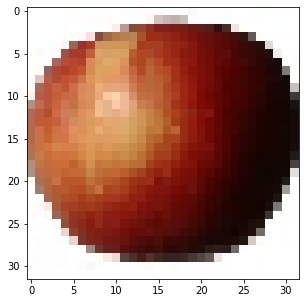

In [9]:
plt.figure(figsize=(5,5))
plt.imshow(array_to_img(X_frutas[0]))

In [10]:
Y_frutas[0]

0

In [11]:
len(X_frutas)

60498

In [12]:
len(Y_frutas)

60498

In [13]:
X_train = np.asarray(X_frutas).astype(np.float32)
Y_train = np.asarray(Y_frutas)

In [14]:
X_train.shape

(60498, 32, 32, 3)

In [15]:
Y_train.shape

(60498,)

In [16]:
X_train = X_train/255

In [17]:
Y_train = to_categorical(Y_train, num_frutas)

In [18]:
Y_train.shape

(60498, 120)

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [20]:
# Cria o modelo
model = Sequential()
#Convolução 2D 
model.add(Conv2D(6, (5, 5), input_shape=(32, 32, 3), activation='relu'))
#Camada de Pooling 	    
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(AveragePooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))
#Convolução 2D
model.add(Conv2D(16, (5, 5), activation='relu'))
#Camada de Pooling 	    
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(AveragePooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))
#Converte o conjunto de imagens e um vetor unidimensional para a entrada da rede neural totalmente conectada
model.add(Flatten())
model.add(Dense(16, activation='relu'))
#model.add(Dropout(0.4))
model.add(Dense(8, activation='relu'))
#model.add(Dropout(0.4))
model.add(Dense(num_frutas, activation='softmax'))
#model.summary()

In [21]:
#plot_model(model, show_shapes=True, show_layer_names=True)

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
checkpointer = ModelCheckpoint(filepath='./modelo_mlp_ex8_2.hdf5', verbose=0,  save_best_only=True, monitor='val_accuracy')

history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=100, batch_size=32, callbacks=[checkpointer], verbose=0)

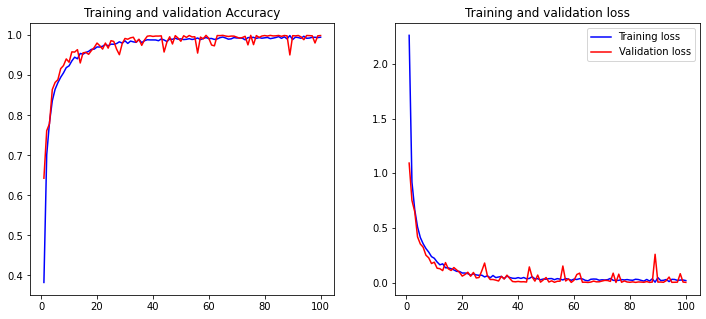

In [24]:
plot_history(history)

In [25]:
model = load_model("./modelo_mlp_ex8_2.hdf5")

In [26]:
scores = model.evaluate(X_train, y_train, verbose=0)
print("Erro da CNN: %.2f%%" % (100-scores[1]*100))
print("Acurácia da CNN: %.2f%%" % (scores[1]*100))

Erro da CNN: 0.04%
Acurácia da CNN: 99.96%


In [27]:
X_frutas, Y_frutas = get_dados(path_teste, num_frutas)

0 - 0 - Apple Braeburn - 164
1 - 1 - Apple Crimson Snow - 148
2 - 2 - Apple Golden 1 - 164
3 - 3 - Apple Golden 2 - 164
4 - 4 - Apple Golden 3 - 161
5 - 5 - Apple Granny Smith - 164
6 - 6 - Apple Pink Lady - 152
7 - 7 - Apple Red 1 - 164
8 - 8 - Apple Red 2 - 164
9 - 9 - Apple Red 3 - 144
10 - 10 - Apple Red Delicious - 166
11 - 11 - Apple Red Yellow 1 - 164
12 - 12 - Apple Red Yellow 2 - 219
13 - 13 - Apricot - 164
14 - 14 - Avocado - 143
15 - 15 - Avocado ripe - 166
16 - 16 - Banana - 166
17 - 17 - Banana Lady Finger - 152
18 - 18 - Banana Red - 166
19 - 19 - Beetroot - 150
20 - 20 - Blueberry - 154
21 - 21 - Cactus fruit - 166
22 - 22 - Cantaloupe 1 - 164
23 - 23 - Cantaloupe 2 - 164
24 - 24 - Carambula - 166
25 - 25 - Cauliflower - 234
26 - 26 - Cherry 1 - 164
27 - 27 - Cherry 2 - 246
28 - 28 - Cherry Rainier - 246
29 - 29 - Cherry Wax Black - 164
30 - 30 - Cherry Wax Red - 164
31 - 31 - Cherry Wax Yellow - 164
32 - 32 - Chestnut - 153
33 - 33 - Clementine - 166
34 - 34 - Cocos - 1

In [56]:
X_test = np.asarray(X_frutas).astype(np.float32)
Y_test = np.asarray(Y_frutas)

In [57]:
X_test = X_test/255
Y_test = to_categorical(Y_test, num_frutas)

In [58]:
X_test.shape

(951, 32, 32, 3)

In [59]:
Y_test.shape

(951, 5)

In [60]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Erro da CNN: %.2f%%" % (100-scores[1]*100))
print("Acurária da CNN: %.2f%%" % (scores[1]*100))

Erro da CNN: 5.99%
Acurária da CNN: 94.01%


In [61]:
print ("Fim Execução : ")
print (datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

Fim Execução : 
2021-07-19 16:57:41
